#REGRESSION

1. What is Simple Linear Regression?
 - Simple Linear Regression is a statistical method used to model the relationship between two variables — one independent variable (predictor) and one dependent variable (outcome). It assumes this relationship can be represented by a straight line, expressed as ( y = b_0 + b_1x + \epsilon ), where ( y ) is the dependent variable, ( x ) is the independent variable, ( b_0 ) is the intercept, ( b_1 ) is the slope (showing how much ( y ) changes for a one-unit change in ( x )), and ( \epsilon ) represents random error. The goal of simple linear regression is to find the best-fitting line that minimizes the difference between the actual data points and the predicted values, allowing us to understand and predict the dependent variable based on the independent one.

2. What are the key assumptions of Simple Linear Regression?
 - The key assumptions of Simple Linear Regression ensure that the model’s results are valid and reliable. They include **linearity**, meaning there is a straight-line relationship between the independent and dependent variables; **independence**, where the observations are independent of each other; **homoscedasticity**, which assumes that the variance of the errors is constant across all levels of the independent variable; and **normality**, meaning the residuals (errors) are normally distributed. Additionally, there should be **no or minimal multicollinearity**, though this is more relevant to multiple regression. When these assumptions are met, the regression estimates are unbiased, efficient, and suitable for making accurate predictions.

3. What is heteroscedasticity, and why is it important to address in regression
models?
 - Heteroscedasticity refers to a situation in regression analysis where the variance of the residuals (errors) is not constant across all levels of the independent variable—meaning that the spread of errors changes as the predicted values increase or decrease. This violates one of the key assumptions of linear regression, which assumes **homoscedasticity** (equal variance of errors). When heteroscedasticity is present, it does not bias the estimated coefficients themselves, but it **makes the standard errors unreliable**, leading to incorrect conclusions about statistical significance (for example, invalid t-tests and confidence intervals). As a result, you might incorrectly believe that a variable is significant when it’s not, or vice versa. Detecting and correcting heteroscedasticity—using methods such as transforming variables, applying weighted least squares, or using robust standard errors—is crucial to ensure that the regression model produces trustworthy inference and accurate predictions.

4. What is Multiple Linear Regression?
- Multiple Linear Regression is a statistical technique used to model the relationship between one dependent variable and two or more independent variables. It extends simple linear regression by allowing multiple predictors, making the model capable of explaining more complex real-world relationships. The equation is typically written as ( y = b_0 + b_1x_1 + b_2x_2 + \dots + b_nx_n + \epsilon ), where ( y ) is the dependent variable, ( x_1, x_2, \dots, x_n ) are independent variables, ( b_0 ) is the intercept, ( b_1, b_2, \dots, b_n ) are the coefficients showing each variable’s effect on ( y ), and ( \epsilon ) represents random error. The goal is to find the line (or hyperplane) that best fits the data by minimizing the difference between observed and predicted values, helping to understand how multiple factors simultaneously influence an outcome and to make accurate predictions.

5. What is polynomial regression, and how does it differ from linear
regression?

 - Polynomial regression is a type of regression analysis used to model relationships between the independent variable ( x ) and the dependent variable ( y ) when the relationship is nonlinear. It extends simple linear regression by including higher-order powers of the independent variable, such as ( x^2, x^3, ) and so on, in the model. The general form is ( y = b_0 + b_1x + b_2x^2 + \dots + b_nx^n + \epsilon ). While **linear regression** fits a straight line to the data, **polynomial regression** fits a curved line that can better capture complex, nonlinear patterns. However, despite the curved shape of the fitted line, the model is still considered “linear” in terms of its parameters (the coefficients ( b_i )), since they appear linearly in the equation. The main advantage of polynomial regression is its flexibility, but it must be used carefully to avoid **overfitting**, where the model becomes too complex and captures random noise instead of the true underlying trend.

6. Implement a Python program to fit a Simple Linear Regression model to
the following sample data:    
● X = [1, 2, 3, 4, 5]     
● Y = [2.1, 4.3, 6.1, 7.9, 10.2]     
Plot the regression line over the data points.

Intercept (b0): 0.18
Slope (b1): 1.98


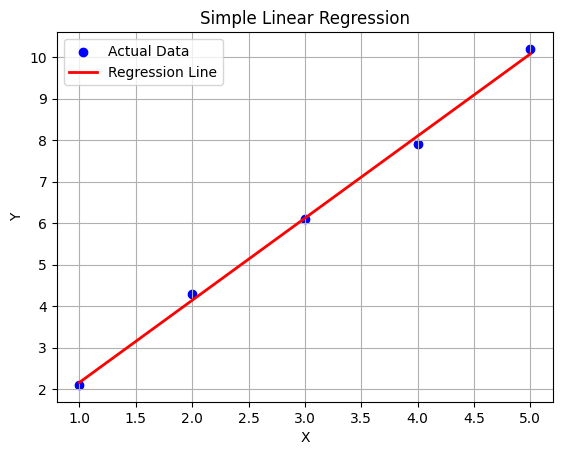

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # Independent variable
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])      # Dependent variable

# Create and fit the Linear Regression model
model = LinearRegression()
model.fit(X, Y)

# Predict values
Y_pred = model.predict(X)

# Print model parameters
print(f"Intercept (b0): {model.intercept_:.2f}")
print(f"Slope (b1): {model.coef_[0]:.2f}")

# Plot the data points and the regression line
plt.scatter(X, Y, color='blue', label='Actual Data')
plt.plot(X, Y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Simple Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()


7. Fit a Multiple Linear Regression model on this sample data:       
● Area = [1200, 1500, 1800, 2000]      
● Rooms = [2, 3, 3, 4]       
● Price = [250000, 300000, 320000, 370000]     
Check for multicollinearity using VIF and report the results.

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Sample data
Area = [1200, 1500, 1800, 2000]
Rooms = [2, 3, 3, 4]
Price = [250000, 300000, 320000, 370000]

# Create a DataFrame
data = pd.DataFrame({
    'Area': Area,
    'Rooms': Rooms,
    'Price': Price
})

# Independent variables (features)
X = data[['Area', 'Rooms']]
y = data['Price']

# Fit Multiple Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Print model coefficients
print("Intercept (b0):", model.intercept_)
print("Coefficients (b1, b2):", model.coef_)

# Check for Multicollinearity using VIF
# Add a constant term for VIF calculation
X_vif = sm.add_constant(X)

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i)
                   for i in range(X_vif.shape[1])]

print("\nVariance Inflation Factor (VIF) Results:")
print(vif_data)


Intercept (b0): 103157.89473684214
Coefficients (b1, b2): [   63.15789474 34736.84210526]

Variance Inflation Factor (VIF) Results:
  Feature        VIF
0   const  34.210526
1    Area   7.736842
2   Rooms   7.736842


8. Implement polynomial regression on the following data:    
● X = [1, 2, 3, 4, 5]    
● Y = [2.2, 4.8, 7.5, 11.2, 14.7]     
Fit a 2nd-degree polynomial and plot the resulting curve.


Model Coefficients: [0.   1.94 0.2 ]
Intercept: 0.06000000000000938


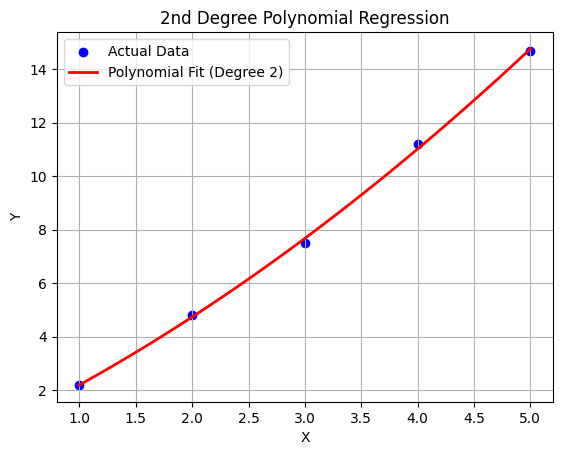

In [3]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Given data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

# Create polynomial features (degree = 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit the Polynomial Regression model
model = LinearRegression()
model.fit(X_poly, Y)

# Predict Y values
Y_pred = model.predict(X_poly)

# Print model parameters
print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Plot the data points
plt.scatter(X, Y, color='blue', label='Actual Data')

# Plot the polynomial regression curve
X_curve = np.linspace(1, 5, 100).reshape(-1, 1)
Y_curve = model.predict(poly.transform(X_curve))
plt.plot(X_curve, Y_curve, color='red', linewidth=2, label='Polynomial Fit (Degree 2)')

# Add labels and title
plt.title('2nd Degree Polynomial Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()


9. Create a residuals plot for a regression model trained on this data:     
● X = [10, 20, 30, 40, 50]      
● Y = [15, 35, 40, 50, 65]     
Assess heteroscedasticity by examining the spread of residuals

Intercept (b0): 6.50
Slope (b1): 1.15
Residuals: [-3.   5.5 -1.  -2.5  1. ]


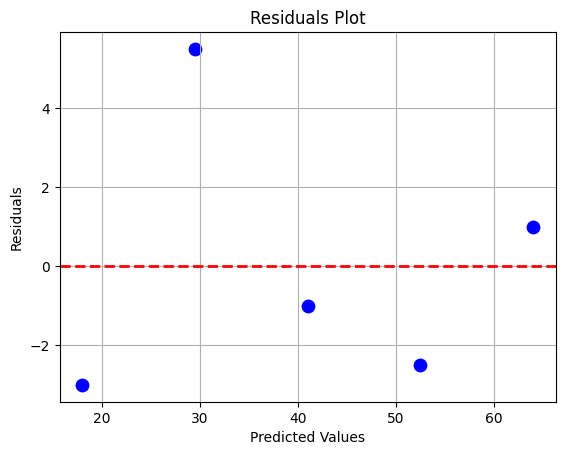

In [4]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Given data
X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

# Fit a Simple Linear Regression model
model = LinearRegression()
model.fit(X, Y)

# Predict Y values
Y_pred = model.predict(X)

# Calculate residuals
residuals = Y - Y_pred

# Print regression coefficients
print(f"Intercept (b0): {model.intercept_:.2f}")
print(f"Slope (b1): {model.coef_[0]:.2f}")
print("Residuals:", residuals)

# Plot residuals vs. predicted values
plt.scatter(Y_pred, residuals, color='blue', s=80)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()


10. Imagine you are a data scientist working for a real estate company. You
need to predict house prices using features like area, number of rooms, and location.
However, you detect heteroscedasticity and multicollinearity in your regression
model. Explain the steps you would take to address these issues and ensure a robust
model.
 - If I were a data scientist working for a real estate company and discovered **heteroscedasticity** and **multicollinearity** in my regression model, I would take several systematic steps to ensure the model remains robust, interpretable, and reliable.
First, to address **heteroscedasticity** (non-constant variance of residuals), I would start by examining residual plots to confirm the issue. Then, I might apply **transformations** to stabilize variance—such as a log or square-root transformation of the dependent variable (house price) or even some predictors (like area). If transformations don’t fully resolve it, I would use **robust standard errors** or switch to **Weighted Least Squares (WLS)** regression, which gives less weight to observations with larger residual variance.
Next, to handle **multicollinearity** (high correlation between predictors like area and number of rooms), I would compute **Variance Inflation Factors (VIF)** to quantify the problem. If VIF values are high, I would consider **removing or combining correlated variables** (e.g., creating “price per square foot” or “rooms per area”) to reduce redundancy. Alternatively, I could use **regularization techniques** such as **Ridge** or **Lasso Regression**, which penalize large coefficients and help stabilize estimates even in the presence of multicollinearity.
Finally, I would **re-evaluate the model’s assumptions** and performance using cross-validation, ensuring that the revised model provides unbiased, stable predictions and interpretable insights for business decisions like property valuation and pricing strategy.
